X=Yのモデルでリッジ回帰の検証を行う

Train Score(est1,est2):(1.000,1.000)
Test Score(est1,est2):(1.000,1.000)


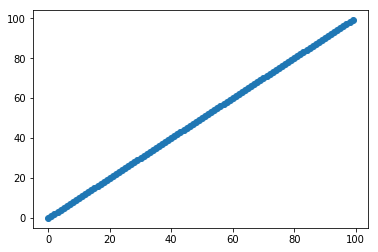

In [54]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


#単純に増えていく数値の書き方
## Xはリスト内包表記
## yはnpの等差数列生成関数
X = np.arange(100)
y = np.array([i for i in range(100)])


#データを処理するにあたり、配列を転置することが必要
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# ホールドアウトのためデータを訓練とテストに分割
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.20,
                                                 random_state=1)

plt.scatter(X,y)

# 二つのモデルを構築(比較用)
# 線形回帰
est1 =  LinearRegression()
est1.fit(X_train,y_train)
# Ridgeモデル
est2 = Ridge(alpha=.5) 
est2.fit(X_train,y_train)


#モデルパフォーマンス指標(R2)の取得
# for training data
r2_est1_train = r2_score(y_train,est1.predict(X_train))
r2_est2_train = r2_score(y_train,est2.predict(X_train))
# for test data
r2_est1_test = r2_score(y_test,est1.predict(X_test))
r2_est2_test = r2_score(y_test,est2.predict(X_test))

# 性能指標の表示
print('Train Score(est1,est2):(%.3f,%.3f)'% (r2_est1_train, r2_est2_train))
print('Test Score(est1,est2):(%.3f,%.3f)'% (r2_est1_test, r2_est2_test))

yを二乗で増えていくようにして、非線形とした

[   0    1    4    9   16   25   36   49   64   81  100  121  144  169
  196  225  256  289  324  361  400  441  484  529  576  625  676  729
  784  841  900  961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681
 1764 1849 1936 2025 2116 2209 2304 2401 2500 2601 2704 2809 2916 3025
 3136 3249 3364 3481 3600 3721 3844 3969 4096 4225 4356 4489 4624 4761
 4900 5041 5184 5329 5476 5625 5776 5929 6084 6241 6400 6561 6724 6889
 7056 7225 7396 7569 7744 7921 8100 8281 8464 8649 8836 9025 9216 9409
 9604 9801]
Train Score(est1,est2):(0.934,0.610)
Test Score(est1,est2):(0.945,0.567)


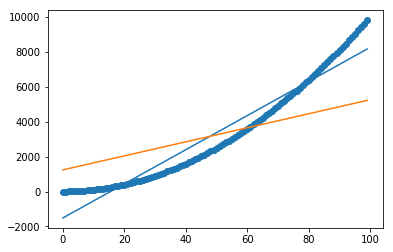

In [55]:
#単純に増えていく数値の書き方
## Xは単純に増加
## yはXの二乗
X = np.arange(100)
y = np.array([i**2 for i in range(100)])

print(y)

#データを処理するにあたり、配列を転置することが必要
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# ホールドアウトのためデータを訓練とテストに分割
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.20,
                                                 random_state=1)

# 二つのモデルを構築(比較用)
# 線形回帰
est1 =  LinearRegression()
est1.fit(X_train,y_train)
# Ridgeモデル　αが十分大きいと、回帰が悪いことがわかる
est2 = Ridge(alpha=100000) 
est2.fit(X_train,y_train)


#モデルパフォーマンス指標(R2)の取得
# for training data
r2_est1_train = r2_score(y_train,est1.predict(X_train))
r2_est2_train = r2_score(y_train,est2.predict(X_train))
# for test data
r2_est1_test = r2_score(y_test,est1.predict(X_test))
r2_est2_test = r2_score(y_test,est2.predict(X_test))

# 性能指標の表示
print('Train Score(est1,est2):(%.3f,%.3f)'% (r2_est1_train, r2_est2_train))
print('Test Score(est1,est2):(%.3f,%.3f)'% (r2_est1_test, r2_est2_test))

#描画
p1 = est1.predict(X)
p2 = est2.predict(X)
plt.scatter(X,y)
plt.plot(X,p1)
plt.plot(X,p2)

y=x^2にてカーネル法を使用するが、その前にカーネル法rfb_kernelの理解

In [56]:
from sklearn.metrics.pairwise import rbf_kernel
from math import exp

## Case1: 単位行列
X = np.array([[1,0],[0,1]])
KX = rbf_kernel(X, X)
print('-------------------')
print(X)
print(KX)

print(X-X)

## Case2: 要素がすべて1
X = np.array([[1,1],[1,1]])
KX = rbf_kernel(X, X)
print('-------------------')
print(X)
print(KX)

## Case3: 要素がすべて1とすべて2
X = np.array([[1,1],[1,1]])
Y = np.array([[2,2],[2,2]])
KX = rbf_kernel(X, Y)
print('-------------------')
print(X)
print(Y)
print(KX)

## Case4: 要素の数をすべて変えて、なにが起きているか理解する
X = np.array([[1,2,3],[4,5,6]])
Y = np.array([[7,8,9],[10,11,12]])
KX = rbf_kernel(X, Y)
print('-------------------')
print(X)
print(Y)
print(KX)
print('--------結果の1, 1を求める-----------')
answer = exp(-(1/3)*((1-7)**2+(2-8)**2+(3-9)**2))
print(answer)
print('--------結果の1, 2を求める-----------')
answer = exp(-(1/3)*((1-10)**2+(2-11)**2+(3-12)**2))
print(answer)
print('--------結果の2, 1を求める-----------')
answer = exp(-(1/3)*((4-7)**2+(5-8)**2+(6-9)**2))
print(answer)
print('--------結果の2, 2を求める-----------')
answer = exp(-(1/3)*((4-10)**2+(5-11)**2+(6-12)**2))
print(answer)

-------------------
[[1 0]
 [0 1]]
[[1.         0.36787944]
 [0.36787944 1.        ]]
[[0 0]
 [0 0]]
-------------------
[[1 1]
 [1 1]]
[[1. 1.]
 [1. 1.]]
-------------------
[[1 1]
 [1 1]]
[[2 2]
 [2 2]]
[[0.36787944 0.36787944]
 [0.36787944 0.36787944]]
-------------------
[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]
[[2.31952283e-16 6.63967720e-36]
 [1.23409804e-04 2.31952283e-16]]
--------結果の1, 1を求める-----------
2.3195228302435696e-16
--------結果の1, 2を求める-----------
6.639677199580735e-36
--------結果の2, 1を求める-----------
0.00012340980408667956
--------結果の2, 2を求める-----------
2.3195228302435696e-16


y=x^2にてカーネル法を使用する

------LinearRegression:Blue------
------Ridge:Orange------


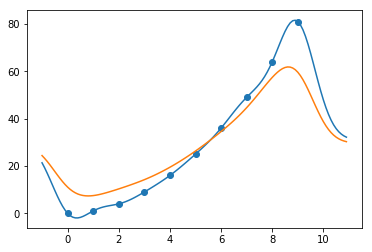

In [68]:
import numpy as np 
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

## Xは単純に増加
## yはXの二乗
X = np.arange(10)
y = np.array([i**2 for i in range(10)])

#データを処理するにあたり、配列を転置することが必要
X = X.reshape(-1,1)
y = y.reshape(-1,1)

KX = rbf_kernel(X, X)

clf = LinearRegression()
clf.fit(KX, y)

#要素間の補正の様子を見たいので、より細かいｘにて様子を観察する
x = np.arange(-1,11,0.1)
x = x.reshape(-1,1)
Kx = rbf_kernel(x, X)
p = clf.predict(Kx)
print('------LinearRegression:Blue------')
plt.scatter(X, y)
plt.plot(x, p)

clf2 = Ridge()
clf2.fit(KX, y)
p2 = clf2.predict(Kx)
print('------Ridge:Orange------')
plt.plot(x, p2)

ノイズをつけて、リッジ回帰のαを適切な値に設定すれば、LinearRegressionよりもRidgeのほうが優れていることがわかる。

------LinearRegression:Red------
------Ridge:Orange------


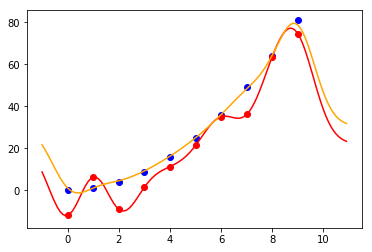

In [83]:
import numpy as np 
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

## Xは単純に増加
## yはXの二乗
X = np.arange(10)
y = np.array([i**2 for i in range(10)])
y_random = y + (-15) + 30 * np.random.random(10)

#データを処理するにあたり、配列を転置することが必要
X = X.reshape(-1,1)
y_random = y_random.reshape(-1,1)

KX = rbf_kernel(X, X)

clf = LinearRegression()
clf.fit(KX, y_random)

#要素間の補正の様子を見たいので、より細かいｘにて様子を観察する
x = np.arange(-1,11,0.1)
x = x.reshape(-1,1)
Kx = rbf_kernel(x, X)
p = clf.predict(Kx)
print('------LinearRegression:Red------')
plt.scatter(X, y, c='blue')
plt.scatter(X, y_random, c='red')
plt.plot(x, p, c='red')

clf2 = Ridge(alpha = 0.05)
clf2.fit(KX, y)
p2 = clf2.predict(Kx)
print('------Ridge:Orange------')
plt.plot(x, p2, c='orange')



001参考：
ノルムに関して
https://mathtrain.jp/lpnorm

scikit-learnで線形モデルとカーネルモデルの回帰分析をやってみた - イラストで学ぶ機会学習
https://qiita.com/kotaroito/items/4eb29d42d7f8c534332f

カーネル関数の使い方：scikit-learn
http://publicjournal.hatenablog.com/entry/2017/03/20/211512
